# Binary Predictions with Negative Sampling
Example of a recommender system making binary predictions instead of predicting a rating.
Demonstrates use of `NegativeSamplingDataIter` to wrap an existing data iterator.
See [BlackOut by Shihao Ji et al](https://arxiv.org/abs/1511.06909) for more on negative sampling.

You need to have python package pandas and bokeh installed (pip install pandas bokeh).

In [1]:
import mxnet as mx
from movielens_data import get_data_iter, max_id
from matrix_fact_alt_metrics import train
import recotools_alt

In [2]:
# If MXNet is not compiled with GPU support (e.g. on OSX), set to [mx.cpu(0)]
# Can be changed to [mx.gpu(0), mx.gpu(1), ..., mx.gpu(N-1)] if there are N GPUs
ctx = [mx.cpu(0)]

In [3]:
pos_train_data, pos_test_data = get_data_iter(batch_size=100)
max_user, max_item = max_id('./ml-100k/u.data')
(max_user, max_item)

(944, 1683)

In [4]:
train_data = recotools_alt.NegativeSamplingDataIter(pos_train_data, sample_ratio=3, positive_label=0, negative_label=1)
test_data = recotools_alt.NegativeSamplingDataIter(pos_test_data, sample_ratio=3,   positive_label=0, negative_label=1)
train_test_data = (train_data, test_data)

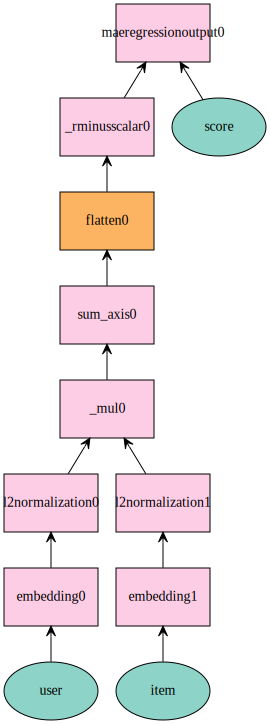

In [5]:
def plain_net(k):
    # input
    user = mx.symbol.Variable('user')
    item = mx.symbol.Variable('item')
    label = mx.symbol.Variable('score')
    # user feature lookup
    user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k)
    # item feature lookup
    item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)
    # loss layer
    pred = recotools_alt.CosineLoss(a=user, b=item, label=label)
    return pred

net1 = plain_net(64)
mx.viz.plot_network(net1)

In [6]:
results1 = train(net1, train_test_data, num_epoch=20, learning_rate=0.02, ctx=ctx)

matrix_fact_alt_metrics.py:106: DeprecationWarning: mxnet.model.FeedForward has been deprecated. Please use mxnet.mod.Module instead.
  **opt_args


Loading BokehJS ...

/usr/local/lib/python2.7/dist-packages/mxnet-0.11.0-py2.7.egg/mxnet/model.py:547: DeprecationWarning: Calling initializer with init(str, NDArray) has been deprecated.please use init(mx.init.InitDesc(...), NDArray) instead.
  self.initializer(k, v)
INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=4.262
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=4.328
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=4.301
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=4.323
INFO:root:Epoch[4] Resetting Data Iterator
INFO:root:Epoch[4] Time cost=4.344
INFO:root:Epoch[5] Resetting Data Iterator
INFO:root:Epoch[5] Time cost=4.349
INFO:root:Epoch[6] Resetting Data Iterator
INFO:root:Epoch[6] Time cost=4.388
INFO:root:Epoch[7] Resetting Data Iterator
INFO:root:Epoch[7] Time cost=4.368
INFO:root:Epoch[8] Resetting Data Iterator
INFO:root:Epoch[8] Time cost=4.370
INFO:root:E

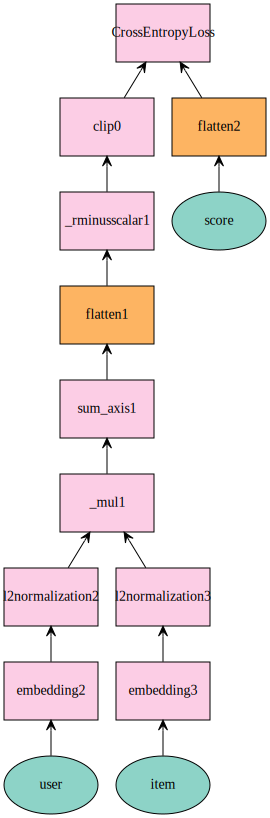

In [7]:
def plain_net2(k):
    # input
    user = mx.symbol.Variable('user')
    item = mx.symbol.Variable('item')
    label = mx.symbol.Variable('score')
    # user feature lookup
    user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k)
    # item feature lookup
    item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)
    # loss layer

    a = mx.symbol.L2Normalization(user)
    b = mx.symbol.L2Normalization(item)
    dot = a * b
    dot = mx.symbol.sum_axis(dot, axis=1)
    dot = mx.symbol.Flatten(dot)
    cosine = 1 - dot
       
    label = mx.symbol.Flatten(label)
    
    cosine = mx.symbol.clip(cosine,0,1)
    
    pred = recotools_alt.CrossEntropyLoss(data=cosine, label=label)
    
    return pred

net2 = plain_net2(64)
mx.viz.plot_network(net2)

In [8]:
results2 = train(net2, train_test_data, num_epoch=20, learning_rate=0.05, ctx=ctx)

Loading BokehJS ...

INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=4.842
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=4.846
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=4.945
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=4.863
INFO:root:Epoch[4] Resetting Data Iterator
INFO:root:Epoch[4] Time cost=4.906
INFO:root:Epoch[5] Resetting Data Iterator
INFO:root:Epoch[5] Time cost=5.075
INFO:root:Epoch[6] Resetting Data Iterator
INFO:root:Epoch[6] Time cost=4.752
INFO:root:Epoch[7] Resetting Data Iterator
INFO:root:Epoch[7] Time cost=4.760
INFO:root:Epoch[8] Resetting Data Iterator
INFO:root:Epoch[8] Time cost=4.765
INFO:root:Epoch[9] Resetting Data Iterator
INFO:root:Epoch[9] Time cost=4.780
INFO:root:Epoch[10] Resetting Data Iterator
INFO:root:Epoch[10] Time cost=4.783
INFO:root:Epoch[11] Resetting Data Iterator
INFO:root:Epoch[11] Time cost=4.797
INFO:root:Epoch[12] R